In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import datetime

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('data.worldometers.csv',index_col=0)

In [3]:
data.head()

,infected
date,
2020-01-23,845
2020-01-24,1317
2020-01-25,2015
2020-01-26,2800
2020-01-27,4581


In [4]:
data.tail()

,infected
date,
2020-04-07,1434167
2020-04-08,1518614
2020-04-09,1604252
2020-04-10,1698881
2020-04-11,1779842


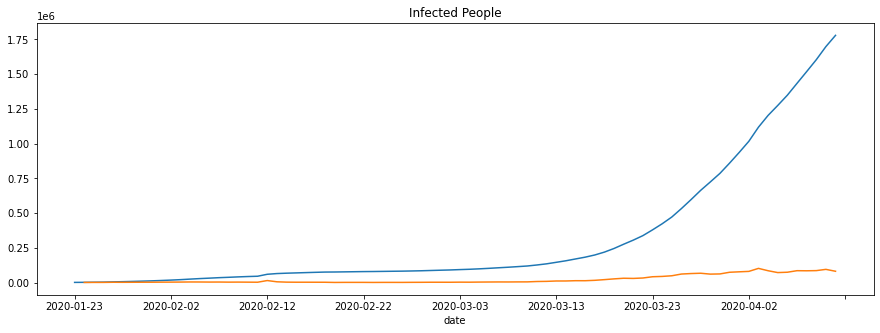

In [5]:
data.infected.plot(figsize=(15, 5), title='Infected People')
(data.infected - data.infected.shift(1)).plot(figsize=(15, 5))

In [6]:
from pyramid.arima import auto_arima

In [7]:
stepwise_model = auto_arima(data,
                            seasonal=False,
                            trace=True,
                            error_action='ignore',  
                            suppress_warnings=True, 
                            stepwise=True)

Fit ARIMA: order=(2, 2, 2); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 2, 0); AIC=1559.365, BIC=1564.078, Fit time=0.032 seconds
Fit ARIMA: order=(1, 2, 0); AIC=1561.110, BIC=1568.180, Fit time=0.702 seconds
Fit ARIMA: order=(0, 2, 1); AIC=1560.893, BIC=1567.963, Fit time=0.409 seconds
Fit ARIMA: order=(1, 2, 1); AIC=1562.049, BIC=1571.476, Fit time=1.816 seconds
Total fit time: 4.465 seconds


In [8]:
stepwise_model.aic()

1559.3648532479945

In [9]:
stepwise_model.fit(data)

ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(0, 2, 0),
      out_of_sample_size=0, scoring='mse', scoring_args={}, seasonal_order=None,
      solver='lbfgs', start_params=None, suppress_warnings=True,
      transparams=True, trend='c')

In [10]:
predicted_days = 5
firstPredictionDay = datetime.datetime.strptime(data.index[-1], '%Y-%m-%d') + datetime.timedelta(days = 1)

In [11]:
future_forecast = stepwise_model.predict(n_periods=predicted_days)

In [12]:
for x in range (0, predicted_days):
    print(str(firstPredictionDay + datetime.timedelta(days = x))[0:10] + " - " +str(int(future_forecast[x])))

2020-04-12 - 1861834
2020-04-13 - 1944859
2020-04-14 - 2028916
2020-04-15 - 2114005
2020-04-16 - 2200125
